<center> <h1>Stock Analysis with Pandas and Scikit-Learn</h1> </center>

This project was created by Paulo Coronado and inspired by Vincent Tatan publication (https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7).

In this demo we are going to analyze stock prices using the traditional way of Machine Learning: using data analytics on top of popular Python libraries.

# Predicting Stocks Price

### Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import math
import datetime
import pandas_datareader.data as web

from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Data Acquisition

For demonstration purposes, we are going to use historial data from IBM in order to analyze its behavior. So, let's extract IBM stocks price from Yahoo Finance repository using as parameters, the stock name and time.

Pandas web data reader is an extension of pandas library to communicate with most updated financial data. This will include sources as: Yahoo Finance, Google Finance, Enigma, etc.

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 5)

df = web.DataReader("IBM", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,136.070007,134.360001,135.580002,135.529999,2960600.0,135.529999
2019-09-03,134.899994,133.330002,134.850006,134.100006,2827900.0,134.100006
2019-09-04,136.429993,135.149994,135.710007,136.320007,2247900.0,136.320007
2019-09-05,141.699997,138.050003,138.300003,140.970001,5011600.0,140.970001
2019-09-06,141.529999,140.460007,141.520004,140.570007,2576800.0,140.570007


## Exploring Rolling Mean and Return Rate of Stocks

### Moving Average

**Definition:**

*A simple moving average (SMA) is an **arithmetic moving average** calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average - Investopedia.*

In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.

In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [4]:
mavg.tail(10)

Date
2019-08-23    137.115582
2019-08-26    137.012573
2019-08-27    136.929666
2019-08-28    136.857776
2019-08-29    136.806011
2019-08-30    136.773248
2019-09-03    136.717297
2019-09-04    136.676123
2019-09-05    136.675882
2019-09-06    136.676035
Name: Adj Close, dtype: float64

### Moving Average Visualization

Let's overlay the Moving Average with our Stocks Price Chart to see how the Moving Average behave.

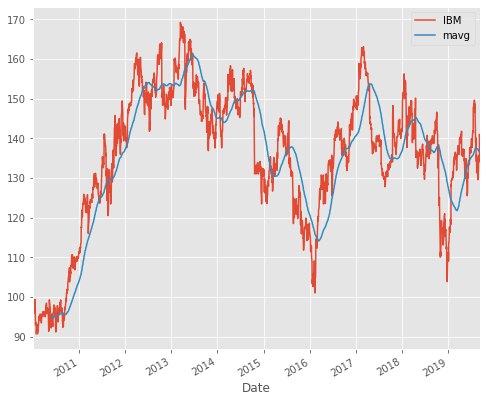

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='IBM')
mavg.plot(label='mavg')
plt.legend()

### Risk and Return

**Definition:**

*Expected Return measures the mean, or expected value, of the **probability distribution of investment returns**. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - Investopedia.*

Following is the formula you could refer to:

\begin{equation*}
r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}}-1
\end{equation*}

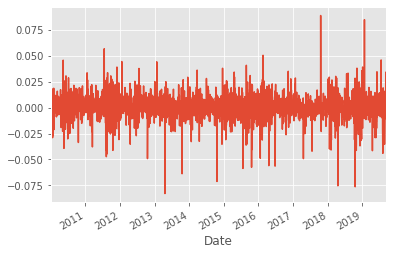

In [6]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

## Analysing Competitors Stocks

In this segment, we are going to analyse on how one company performs in relative with its competitor. Let’s assume we are interested in technology companies and want to compare ***the big guns***: Apple, GE, Google, IBM, and Microsoft.

In [7]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-30,208.740005,8.25,1188.099976,135.529999,137.860001
2019-09-03,205.699997,8.33,1168.390015,134.100006,136.039993
2019-09-04,209.190002,8.80,1181.410034,136.320007,137.630005
2019-09-05,213.279999,8.81,1211.380005,140.970001,140.050003
2019-09-06,213.259995,8.71,1204.930054,140.570007,139.100006


### Correlation Analysis — Does one competitor affect others?

We can analyse the competition by running the percentage change and correlation function in Pandas. Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns.

In [8]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

In [9]:
corr.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.321280,0.463624,0.386921,0.458291
GE,0.321280,1.000000,0.332088,0.437627,0.361763
GOOG,0.463624,0.332088,1.000000,0.407711,0.539266
IBM,0.386921,0.437627,0.407711,1.000000,0.492707
MSFT,0.458291,0.361763,0.539266,0.492707,1.000000


Let’s plot IBM and Microsoft with ScatterPlot to view their return distributions (in percent).

Text(0, 0.5, 'Returns MSFT')

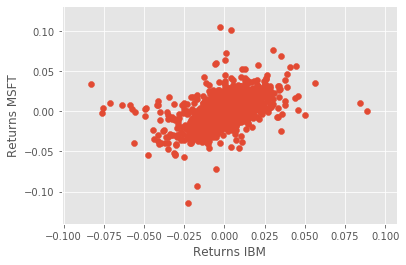

In [10]:
plt.scatter(retscomp.IBM, retscomp.MSFT)
plt.xlabel('Returns IBM')
plt.ylabel('Returns MSFT')

We can see here that there are slight positive correlations among IBM returns and Microsoft returns. It seems like that the higher the IBM returns, the higher Microsoft returns as well for most cases.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


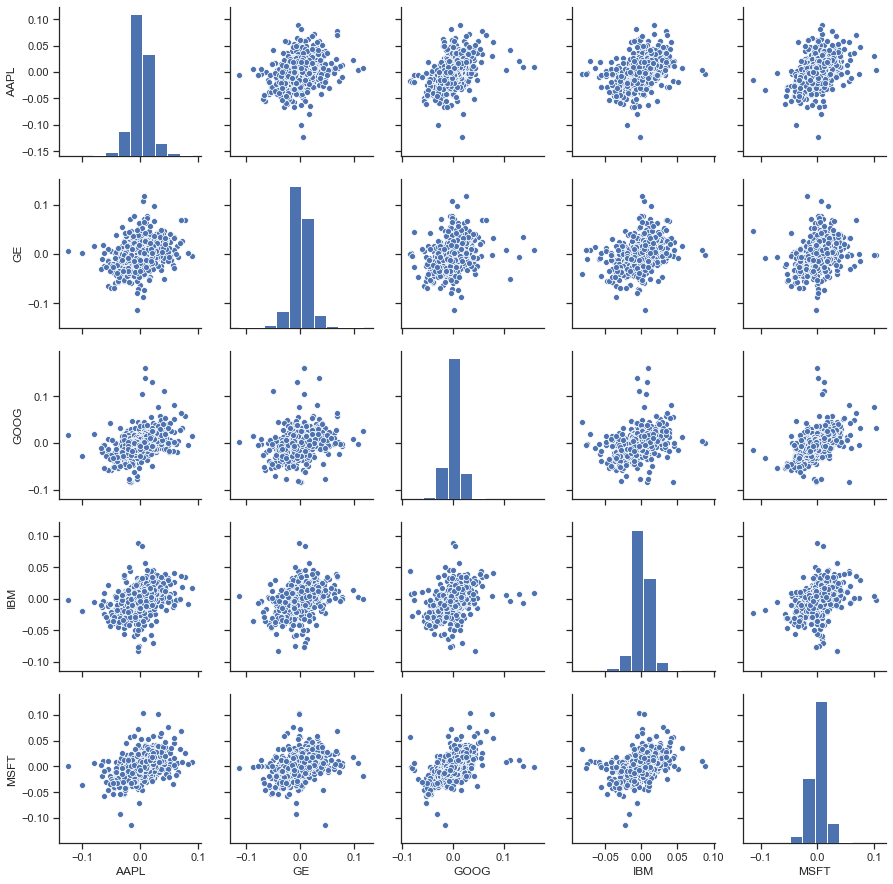

In [11]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(retscomp)

From here we could see most of the distributions among stocks which approximately positive correlations.

To evidence the correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

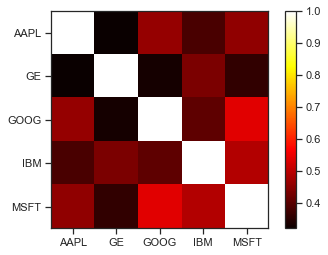

In [12]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

### Stocks Returns Rate and Risk

Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the **average of returns (Return Rate)** and the **standard deviation of returns (Risk)**.

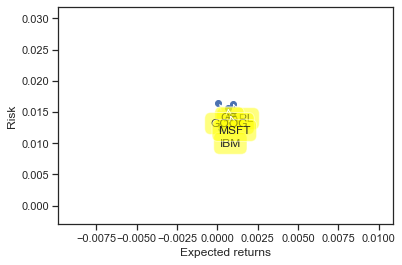

In [13]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. Therefore, you would want to draw the line for your risk-return tolerance (The red line). You would then create the rules to buy those stocks under the red line and sell those stocks above the red line. This red line showcases your expected value threshold and your baseline for buy/sell decision.

<img src="img/return-risk.png" alt="Drawing" style="width: 500px;"/>

## Data Preparation

### Feature Engineering

We will use these three machine learning models to predict our stocks: Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K-Nearest Neighbor (KNN). But first, let us engineer some features: **High/Low Percentage and Percentage Change**.

In [14]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-08-30,135.529999,2960600.0,1.261718,-0.036881
2019-09-03,134.100006,2827900.0,1.170762,-0.556174
2019-09-04,136.320007,2247900.0,0.938966,0.449488
2019-09-05,140.970001,5011600.0,2.589199,1.930584
2019-09-06,140.570007,2576800.0,0.761181,-0.671281


### Pre-processing & Cross Validation

We will clean up and process the data using the following steps before putting them into the prediction models:

1. Drop missing value;
2. Separating the label here, we want to predict the **AdjClose**;
3. Scale the X so that everyone can have the same distribution for linear regression;
4. Finally we want to find Data Series of late X and early X (train) for model generation and evaluation;
5. Separate label and identify it as y;
6. Separation of training and testing of model by cross validation train test split.

In [15]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'

# The output (label) is the Adj Close shifted - because it is the "ideal" future. 
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally we want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]

X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])

y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [16]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-08-30,135.529999,2960600.0,1.261718,-0.036881,NaN
2019-09-03,134.100006,2827900.0,1.170762,-0.556174,NaN
2019-09-04,136.320007,2247900.0,0.938966,0.449488,NaN
2019-09-05,140.970001,5011600.0,2.589199,1.930584,NaN
2019-09-06,140.570007,2576800.0,0.761181,-0.671281,NaN


## Model Generation

### Simple Linear Analysis & Quadratic Discriminant Analysis

**Simple Linear Analysis** shows a linear relationship between two or more variables. When we draw this relationship within two variables, we get a straight line.

**Quadratic Discriminant Analysis** would be similar to Simple Linear Analysis, except that the model allowed polynomial (e.g.: x squared) and would produce curves.

In [17]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X, y)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X, y)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## Evaluation

A simple and quick way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [18]:
confidencereg = clfreg.score(X_lately, y_lately)
confidencepoly2 = clfpoly2.score(X_lately, y_lately)
confidencepoly3 = clfpoly3.score(X_lately, y_lately)

print('The linear regression confidence is: ', confidencereg)
print('The quadratic regression 2 confidence is: ', confidencepoly2)
print('The quadratic regression 3 confidence is: ', confidencepoly3)

The linear regression confidence is:  0.8039765221445275
The quadratic regression 2 confidence is:  0.7176698499044403
The quadratic regression 3 confidence is:  0.6306137400827956


*OBS.: Although the evaluation seems like coeherent, the way it was implemented is **wrong** once the score at this moment, .score() compares the predicted value (which is absolutely fine) with the **ACTUAL** Closing Price. The solution for this problem is, right at the beginnig of this notebook, split the data into training and testing. So, the evaluation could be done with the testing one and .score() will evaluate the predicted value compared to the testing one (with the 25 rows shift).* 

## Prediction

In [19]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

### Plotting the Prediction

Based on the forecast, we will visualize the plot with our existing historical data. This will help us visualize how the model fares to predict future stocks pricing.

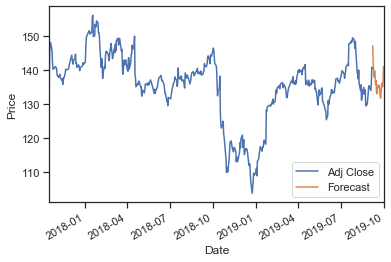

In [20]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Improving AutoML

In order to improve our model, let's test two of the most popular AutoML frameworks - TPOT and H2O AutoML - and verify it there are some improvements compared with the model trained previously. 

### TPOT AutoML Implementation

So, let's follow some basic steps:

* Import libraries;
* Split the dataset into training and testing;
* Define some training configurations;
* Export the model;
* Infer some data, test and evaluate its performance.

In [21]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('ibm_stock_pipeline.py')

Generation 1 - Current best internal CV score: -52.57507947312301
Generation 2 - Current best internal CV score: -52.53964451439954
Generation 3 - Current best internal CV score: -52.53964451439954
Generation 4 - Current best internal CV score: -52.42663648253923
Generation 5 - Current best internal CV score: -52.42663648253923

Best pipeline: RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), bootstrap=True, max_features=0.25, min_samples_leaf=10, min_samples_split=4, n_estimators=100)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


-46.51279076371543


Once the model is exported, let's train with our data.

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('ibm_training.csv', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-49.717639779565914
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    ExtraTreesRegressor(bootstrap=True, max_features=0.8, min_samples_leaf=2, min_samples_split=16, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


And evaluate the regressor.

In [23]:
confidenceregTPOT = exported_pipeline.score(testing_features, testing_target)

print('The TPOT confidence is: ', confidenceregTPOT)

The TPOT confidence is:  0.801347903451759


### H2O AutoML Implementation

H2O AutoML is slighty easier to implement once there is no need to export the model. Similarly to TPOT let's follow some basic steps:

* Import libraries;
* Split the dataset into training and testing;
* Define some training configurations;
* Infer some data, test and evaluate its performance. 

In [24]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PAULOL~1\AppData\Local\Temp\tmp9ogcmbxm
  JVM stdout: C:\Users\PAULOL~1\AppData\Local\Temp\tmp9ogcmbxm\h2o_PauloLeonardoCoronad_started_from_python.out
  JVM stderr: C:\Users\PAULOL~1\AppData\Local\Temp\tmp9ogcmbxm\h2o_PauloLeonardoCoronad_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,"14 days, 16 hours and 18 minutes"
H2O cluster name:,H2O_from_python_PauloLeonardoCoronad_9k60py
H2O cluster total nodes:,1
H2O cluster free memory:,1.965 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [25]:
df = h2o.import_file("ibm_training.csv")

splits = df.split_frame(ratios = [0.8], seed = 1)
train_h2o = splits[0]
test_h2o = splits[1]

aml = H2OAutoML(max_runtime_secs = 600)

aml.train(y = "target", training_frame = train_h2o)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [26]:
lb = aml.leaderboard

In [27]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190907_163506,50.055,7.07496,50.055,5.40346,0.052055
StackedEnsemble_BestOfFamily_AutoML_20190907_163506,50.2872,7.09135,50.2872,5.44491,0.0522876
GBM_grid_1_AutoML_20190907_163506_model_11,50.4557,7.10322,50.4557,5.43114,0.0522927
GBM_grid_1_AutoML_20190907_163506_model_24,50.727,7.12229,50.727,5.4716,0.0523786
GBM_5_AutoML_20190907_163506,51.3139,7.16337,51.3139,5.51035,0.0528018
GBM_grid_1_AutoML_20190907_163506_model_41,51.331,7.16457,51.331,5.50484,0.0526446
GBM_grid_1_AutoML_20190907_163506_model_25,51.5009,7.17641,51.5009,5.47466,0.0527707
GBM_1_AutoML_20190907_163506,51.5997,7.18329,51.5997,5.48652,0.0528699
GBM_grid_1_AutoML_20190907_163506_model_16,51.7379,7.1929,51.7379,5.60608,0.0530277
GBM_2_AutoML_20190907_163506,52.0227,7.21268,52.0227,5.53823,0.0531597


In [28]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190907_163506

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 30.853177406768676
RMSE: 5.554563655839105
MAE: 4.235091265187895
RMSLE: 0.04088472322785204
R^2: 0.8956424284054899
Mean Residual Deviance: 30.853177406768676
Null degrees of freedom: 1931
Residual degrees of freedom: 1908
Null deviance: 571193.2334099709
Residual deviance: 59608.33874987708
AIC: 12158.069670765139

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 50.05500933206288
RMSE: 7.074956489764646
MAE: 5.4034599545125275
RMSLE: 0.05205496410746634
R^2: 0.8306942863237053
Mean Residual Deviance: 50.05500933206288
Null degrees of freedom: 1931
Residual degrees of freedom: 1906
Null deviance: 572423.4762433413
Residual deviance: 96706.27802954549
AIC: 13096.931330981153
